Preprocessed MobileNetV2 Trained Model

In [1]:
# STEP 1: Import packages and mount Google Drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, relu, softmax
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Dataset structure path and training settings
base_dir = "/content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset"
train_dir = os.path.join(base_dir, "Training Data")
val_dir = os.path.join(base_dir, "Validation Data")
test_dir = os.path.join(base_dir, "Testing Data")

# Image and training settings
img_size = (128, 128)
batch_size = 32
epochs = 25

# Create image generators for training, validation, and testing
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 3477 images belonging to 3 classes.
Found 498 images belonging to 3 classes.
Found 993 images belonging to 3 classes.


In [3]:
# STEP 3: Create MobileNetV2 model architecture
print("🚀 Creating new MobileNetV2 model...")
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = Activation(swish)(x)
x = Dense(128)(x)
x = Activation(relu)(x)
x = Dropout(0.3)(x)
output = Dense(3, activation=softmax)(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ModelCheckpoint callback to save best model based on validation accuracy
checkpoint_path = "/content/drive/MyDrive/Best Preprocessed MobileNetV2 Trained Model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)


🚀 Creating new MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,619,203 (9.99 MB)

 Trainable params: 361,219 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# STEP 4: Train the model with checkpoint callback
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Save final trained model only (for future reference)
model.save("/content/drive/MyDrive/Preprocessed MobileNetV2 Trained Model.h5")
print("✅ Final model saved as Preprocessed MobileNetV2 Trained Model.h5")


Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9456 - loss: 0.1580
Epoch 1: val_accuracy improved from 0.83936 to 0.84337, saving model to /content/drive/MyDrive/Best Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 484ms/step - accuracy: 0.9456 - loss: 0.1581 - val_accuracy: 0.8434 - val_loss: 0.4024
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.9514 - loss: 0.1528
Epoch 2: val_accuracy did not improve from 0.84337
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 462ms/step - accuracy: 0.9513 - loss: 0.1528 - val_accuracy: 0.8373 - val_loss: 0.4142
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9618 - loss: 0.1346
Epoch 3: val_accuracy did not improve from 0.84337
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 463ms/step - accuracy: 0.9617 - loss: 0.1347 - val_accuracy: 0.8313 - val_loss: 0.4040
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9570 - loss: 0.1393
Epoch 4: val_accuracy did not improve from 0.84337
109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 470ms/step - accuracy: 0.9570 - loss: 0.1393 - val_accuracy: 0.8353 - val_loss: 0.4385
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9574 - loss: 0.1346
Epoch 5: val_ac

109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 479ms/step - accuracy: 0.9616 - loss: 0.1225 - val_accuracy: 0.8494 - val_loss: 0.4301
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9674 - loss: 0.1088
Epoch 8: val_accuracy did not improve from 0.84940
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 463ms/step - accuracy: 0.9674 - loss: 0.1089 - val_accuracy: 0.8313 - val_loss: 0.4380
Epoch 9/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9794 - loss: 0.0904
Epoch 9: val_accuracy improved from 0.84940 to 0.85141, saving model to /content/drive/MyDrive/Best Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 84s 481ms/step - accuracy: 0.9794 - loss: 0.0905 - val_accuracy: 0.8514 - val_loss: 0.4568
Epoch 10/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.9726 - loss: 0.1045
Epoch 10: val_accuracy did not improve from 0.85141
109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 466ms/step - accuracy: 0.9725 - loss: 0.1045 - val_accuracy: 0.8474 - val_loss: 0.4398
Epoch 11/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9706 - loss: 0.0996
Epoch 11: val_accuracy did not improve from 0.85141
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 483ms/step - accuracy: 0.9707 - loss: 0.0995 - val_accuracy: 0.8454 - val_loss: 0.4451
Epoch 12/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9767 - loss: 0.0905
Epoch 12: val_accuracy did not improve from 0.85141
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 486ms/step - accuracy: 0.9767 - loss: 0.0905 - val_accuracy: 0.8474 - val_loss: 0.4551
Epoch 13/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9767 - loss: 0.0818
Epoch 13

109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 468ms/step - accuracy: 0.9845 - loss: 0.0713 - val_accuracy: 0.8534 - val_loss: 0.4669
Epoch 16/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.9878 - loss: 0.0622
Epoch 16: val_accuracy did not improve from 0.85341
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 461ms/step - accuracy: 0.9877 - loss: 0.0622 - val_accuracy: 0.8534 - val_loss: 0.4663
Epoch 17/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9868 - loss: 0.0608
Epoch 17: val_accuracy improved from 0.85341 to 0.86747, saving model to /content/drive/MyDrive/Best Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 471ms/step - accuracy: 0.9868 - loss: 0.0608 - val_accuracy: 0.8675 - val_loss: 0.4439
Epoch 18/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9882 - loss: 0.0575
Epoch 18: val_accuracy did not improve from 0.86747
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 488ms/step - accuracy: 0.9881 - loss: 0.0575 - val_accuracy: 0.8494 - val_loss: 0.4783
Epoch 19/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9911 - loss: 0.0560
Epoch 19: val_accuracy did not improve from 0.86747
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 483ms/step - accuracy: 0.9910 - loss: 0.0560 - val_accuracy: 0.8454 - val_loss: 0.5140
Epoch 20/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9822 - loss: 0.0687
Epoch 20: val_accuracy did not improve from 0.86747
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 483ms/step - accuracy: 0.9822 - loss: 0.0686 - val_accuracy: 0.8514 - val_loss: 0.4852
Epoch 21/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9890 - loss: 0.0512
Epoch 21

✅ Final model saved as Preprocessed MobileNetV2 Trained Model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.7759 - loss: 0.7347

✅ Test Accuracy: 83.08%
✅ Test Loss: 0.6120


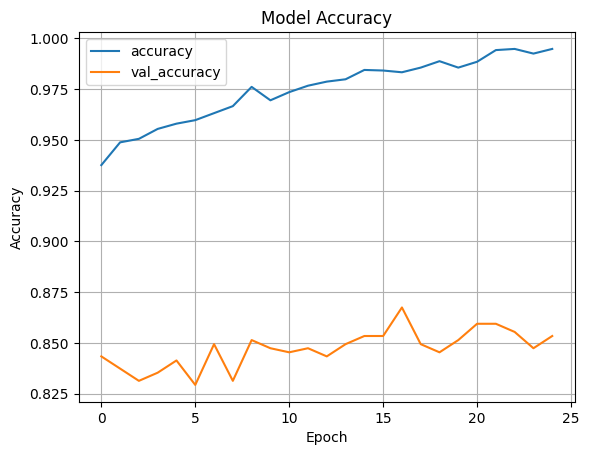

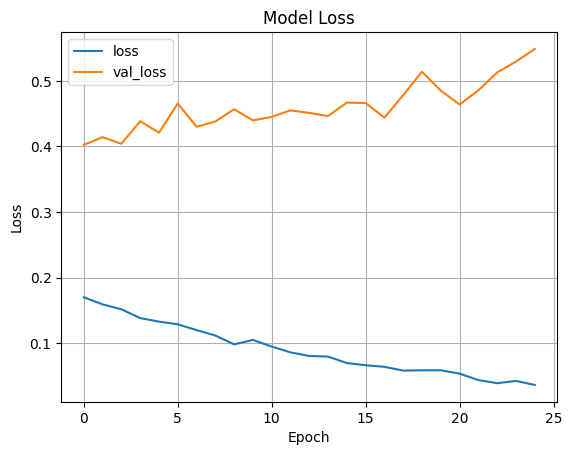

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step

📑 Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.82      0.69      0.75       331
             Normal       0.90      0.98      0.94       331
    Viral Pneumonia       0.77      0.83      0.80       331

           accuracy                           0.83       993
          macro avg       0.83      0.83      0.83       993
       weighted avg       0.83      0.83      0.83       993


✅ Weighted F1 Score: 0.8277
✅ Weighted Recall: 0.8308
✅ Weighted Precision: 0.8298


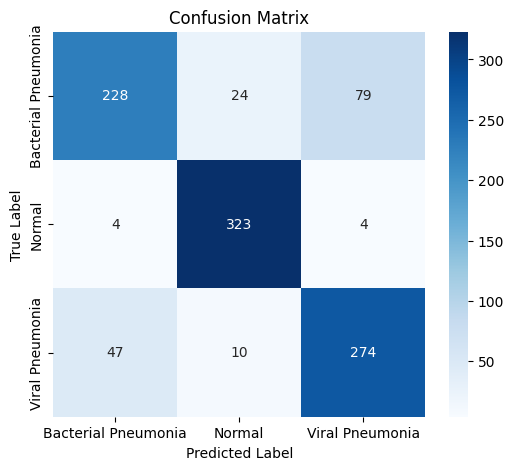

In [8]:
# STEP 5: Evaluate model performance on the test set
loss, accuracy = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"✅ Test Loss: {loss:.4f}")

# Plot accuracy and loss trends during training
metrics = pd.DataFrame(history.history)

# Accuracy plot
metrics[['accuracy', 'val_accuracy']].plot(title="Model Accuracy", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss plot
metrics[['loss', 'val_loss']].plot(title="Model Loss", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# STEP 5.1: Generate predictions for the test set
y_true = test_gen.classes
y_pred_probabilities = model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_pred_probabilities, axis=1)
class_labels = list(test_gen.class_indices.keys())

# STEP 5.2: Print classification report and calculate additional metrics
print("\n📑 Classification Report:")


print(classification_report(y_true, y_pred, target_names=class_labels))

f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f"\n✅ Weighted F1 Score: {f1:.4f}")
print(f"✅ Weighted Recall: {recall:.4f}")
print(f"✅ Weighted Precision: {precision:.4f}")

# STEP 5.3: Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
# STEP 6: Print and save final metrics summary
print("\n📊 Final Metrics Table:")
final_metrics = {
    "Dataset": ["Training", "Validation", "Test"],
    "Accuracy": [
        metrics['accuracy'].iloc[-1],
        metrics['val_accuracy'].iloc[-1],
        accuracy
    ],
    "Loss": [
        metrics['loss'].iloc[-1],
        metrics['val_loss'].iloc[-1],
        loss
    ],
    "F1 Score": ["-", "-", f1],
    "Recall": ["-", "-", recall],
    "Precision": ["-", "-", precision]
}
df_final = pd.DataFrame(final_metrics)
print(df_final.round(4))

# Save training history to a CSV file
metrics.to_csv("/content/drive/MyDrive/Preprocessed MobileNetV2 Training Model History.csv", index=False)
print("✅ History saved to Preprocessed MobileNetV2 Training Model History.csv")



📊 Final Metrics Table:
      Dataset  Accuracy    Loss  F1 Score    Recall Precision
0    Training    0.9948  0.0362         -         -         -
1  Validation    0.8534  0.5488         -         -         -
2        Test    0.8308  0.6120  0.827669  0.830816  0.829824
✅ History saved to Preprocessed MobileNetV2 Training Model History.csv
